<a href="https://colab.research.google.com/github/getcontrol/maskrcnn-hacks/blob/main/Copy_of_Skymap_Segmentation_Cross_Entropy_EfficientNetB0_Attention_MLFlow_Abhishek_Neha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install the required packages

In [ ]:
!pip install segmentation-models-pytorch
!pip uninstall  albumentations 
!pip install pip install git+https://github.com/albumentations-team/albumentations -U
!pip install pytorch_toolbelt 
!pip install ipython
!pip install "ray[default, tune]" pytorch-lightning

Found existing installation: albumentations 1.0.3
Uninstalling albumentations-1.0.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/albumentations-1.0.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/albumentations/*
Proceed (y/n)? y
  Successfully uninstalled albumentations-1.0.3
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-f5yyueq7
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-f5yyueq7
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Created wheel for albumentations: filename=albumentations-1.0.3-py3-none-any.whl size=98755 sha256=5aa9df67c78e1c778f45d6176d958fee4c12869686f4a464b8e1501df22642de
  Stored in directory: /tmp/pip-ephem-wheel-cache-uwhcenb8/wheels/3a/25/ed/ec3b518e7a332d7f0a3bb37c280e1b784cf2f79b94b3c7d00b
Successfully built albumentations
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
!pip install torchtext==0.9.1

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None


In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch #Fix No module named 'segmentation_models_pytorch'

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-5a4ci0wb
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-5a4ci0wb
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit ec807040a580b6c5cb01240bf1fd275100c1858d


In [ ]:
!pip install -U git+https://github.com/albumentations-team/albumentations --no-cache-dir #fix module 'albumentations' has no attribute 'Perspective'
#!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-409ojjh1
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-409ojjh1
  Resolved https://github.com/albumentations-team/albumentations to commit 3d3d6458e798588b820c00405c2ba6652f3fb9e9


## Dataset Used for Semantic Segmentation

In [ ]:
! gdown https://drive.google.com/uc?id=1e1PdQkTmjWSOhEfg5zJt5k5wdbkpUKlr

Downloading...
From: https://drive.google.com/uc?id=1e1PdQkTmjWSOhEfg5zJt5k5wdbkpUKlr
To: /content/data_semantic_segmentation_selected.zip
759MB [00:07, 95.0MB/s]


In [ ]:
 ! unzip -oqq /content/data_semantic_segmentation_selected.zip

##Import the required packages

In [ ]:
import os
import gc
import cv2
import torch
import shutil
import random
import IPython
import numpy as np
from getpass import getpass
from glob import glob
from skimage import color
import albumentations as albu
from google.colab import files
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp
from torch.utils.data import Dataset as BaseDataset
# from ray.tune.integration.mlflow import mlflow_mixin

## Configure MLflow 🧐

Set Environment Variables

In [ ]:
#@title Enter the repository name for the project:

REPO_NAME= "SkyMaps" #@param {type:"string"}

In [ ]:
#@title Enter the username of your DAGsHub account:

USER_NAME = "Omdena" #@param {type:"string"}

In [ ]:
#@title Enter the username of your DAGsHub account:

CONTRIBUTOR_NAME = "neha81032" #@param {type:"string"}

**Initialize MLflow**

**Set Local Configurations**

Under the [Token tab](https://dagshub.com/user/settings/tokens) in the user setting, copy the default token and use it here.

Could make it work if 2FA is enabled on DagsHub.

In [ ]:
os.environ['MLFLOW_TRACKING_USERNAME'] = CONTRIBUTOR_NAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token or password: ')
# token = getpass('Enter your DAGsHub access only token: ')

mlflow.set_tracking_uri(f'https://dagshub.com/{USER_NAME}/{REPO_NAME}.mlflow')
# mlflow.set_tracking_uri(f'https://{token}@dagshub.com/{USER_NAME}/{REPO_NAME}.mlflow')

In [ ]:
print(f"https://dagshub.com/{USER_NAME}/{REPO_NAME}/experiments/#/")
display(IPython.display.IFrame(f"https://dagshub.com/{USER_NAME}/{REPO_NAME}/experiments/#/",'100%',600))

## UNet Model : EffNet-B0 + Attention

In [ ]:
def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch()

In [ ]:
from glob import glob
train_images      = sorted(glob('/content/imgs/train/*'))
validation_images = sorted(glob('/content/imgs/validation/*'))
test_images       = sorted(glob('/content/imgs/test/*'))

train_masks      = sorted(glob('/content/masks/train/*'))
validation_masks = sorted(glob('/content/masks/validation/*'))
test_masks       = sorted(glob('/content/masks/test/*'))

# train_images.pop(0)
# train_masks.pop(0)

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [ ]:
try:
  for i in train_images:
    if cv2.imread(i) == None:
      print(i)
except Exception as e:
  print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


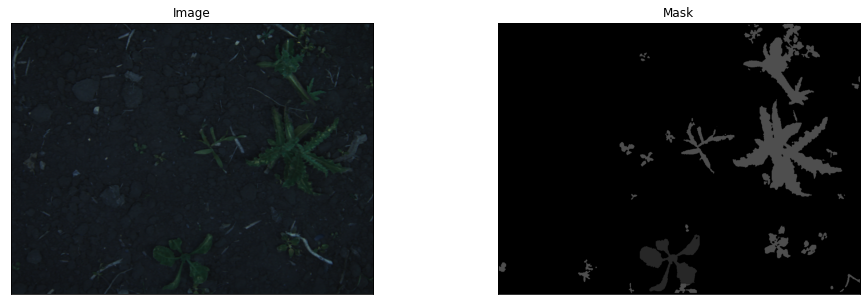

In [ ]:
visualize(image=cv2.imread(train_images[0]), mask=cv2.imread(train_masks[0]))

In [ ]:
class Dataset(BaseDataset):
    def __init__(
            self,
            typ='train', 
            augmentation=None, 
            preprocessing=None,
    ):
        if typ == 'train':
          self.images = train_images
          self.masks = train_masks
        elif typ == 'valid':
          self.images = validation_images
          self.masks = validation_masks
        elif typ == 'test':
          self.images = test_images
          self.masks = test_masks

        self.typ = typ
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = np.array(ImageOps.autocontrast(Image.open(self.images[i]).convert('RGB')))
        mask = np.array(Image.open(self.masks[i]).convert('L'))

        bmask = np.array((mask == 0).astype(int))
        # bmask = np.array((mask == 0).astype(int)) + np.array((mask == 39).astype(int))
        pmask = np.array((mask == 39).astype(int))
        wmask = np.array((mask == 78).astype(int))

        # mask = np.stack([bmask, pmask, wmask], axis=-1).astype('float')
        # mask = np.stack([bmask, wmask], axis=-1).astype('float')
        mask = 0 * bmask + 1 * pmask + 2 * wmask
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image / 255., mask
        
    def __len__(self):
        return len(self.images)

801
(768, 1024)


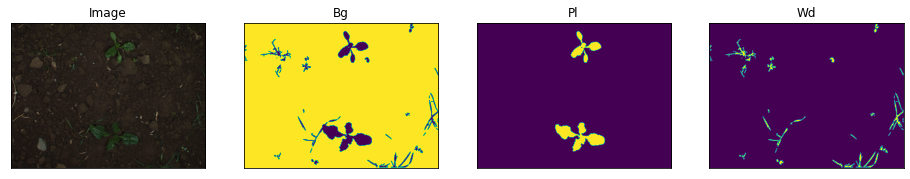

In [ ]:
dataset = Dataset(typ='train')
print(len(dataset))

image, mask = dataset[1] # get some sample
print(mask.shape)

visualize(image=image, bg=mask == 0, pl=mask == 1, wd=mask == 2)

In [ ]:
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.2, rotate_limit=90, shift_limit=0.3, p=0.3, border_mode=0),
        albu.SmallestMaxSize(max_size=768, always_apply=True),
        albu.GaussNoise(p=0.3),
        albu.Perspective(p=0.3),

        albu.OneOf(
            [
                albu.CLAHE(p=0.3),
                albu.RandomBrightnessContrast(p=0.3),
                albu.RandomGamma(p=0.3),
                albu.HueSaturationValue(p=0.3)
            ],
            p=0.3,
        ),

        albu.OneOf(
            [
                albu.Sharpen(p=0.3),
                albu.Blur(blur_limit=3, p=0.3),
                albu.MotionBlur(blur_limit=3, p=0.3),
            ],
            p=0.3,
        )
    ]

    return albu.Compose(train_transform)


def get_validation_augmentation():
    test_transform = [
        albu.SmallestMaxSize(max_size=768, always_apply=True),
    ]
    return albu.Compose(test_transform)

def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def to_tensor_mask(x, **kwargs):
    return x.astype('int32')

def get_preprocessing(preprocessing_fn):
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor_mask),
    ]
    
    return albu.Compose(_transform)

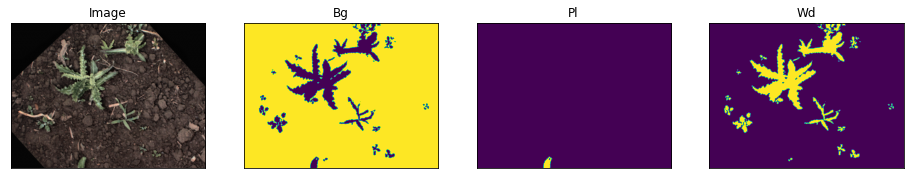

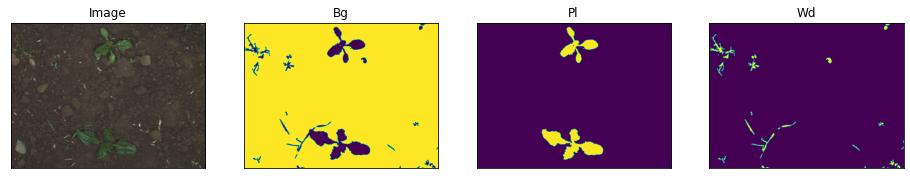

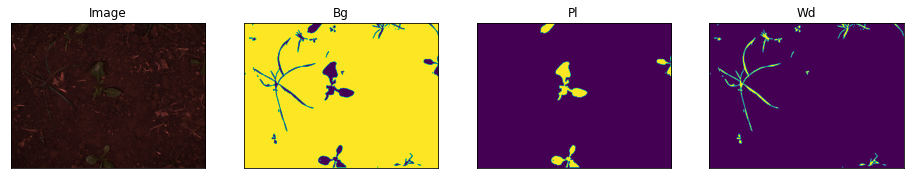

In [ ]:
augmented_dataset = Dataset(
    augmentation=get_training_augmentation() 
)

for i in range(3):
    image, mask = augmented_dataset[i]
    visualize(image=image, bg=mask == 0, pl=mask == 1, wd=mask == 2)

In [ ]:
ENCODER = 'timm-efficientnet-b0' # 'resnet34' 
ENCODER_WEIGHTS = 'noisy-student' # 'imagenet'  
ACTIVATION = None 
DEVICE = 'cuda'

model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS, 
    classes=3,
    activation=ACTIVATION,
    decoder_attention_type='scse'
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

train_dataset = Dataset(
    typ = 'train',
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
)

valid_dataset = Dataset(
    typ = 'valid',
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2)
valid_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=2)

In [ ]:
class IoU(torch.nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(IoU, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        # print(np.unique(inputs.cpu().numpy().flatten()))
        # print(np.unique(targets.cpu().numpy().flatten()))

        # inputs = F.sigmoid(inputs)   

        inputs = inputs.long()
        targets = targets.long()

        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()
        total = (inputs + targets).sum()
        union = total - intersection 
        
        IoU = (intersection + smooth)/(union + smooth)
                
        return IoU

# lloss = IoULoss()
lloss = torch.nn.CrossEntropyLoss(weight=torch.tensor([0.1, 0.2, 0.7]).to('cuda'))

metrics = [
    IoU()
]

optimizer = torch.optim.Adam(params=model.parameters())

RuntimeError: ignored

In [ ]:
def show(x, y, pred):
    # print(x.shape)
    # print(y.shape)
    # print(pred.shape)
    image, gt_mask = x[0], y[0]
    pr_mask = pred[0]

    visualize(
        image=np.moveaxis(image * 255, 0, -1),
        bg_gt=gt_mask == 0,
        pl_gt=gt_mask == 1,
        wd_gt=gt_mask == 2,
        bg_mask=pr_mask == 0,
        pl_mask=pr_mask == 1,
        wd_mask=pr_mask == 2
    )

## Train the model and save it

In [ ]:
max_score = 1000
device = 'cuda'
model.to(device)
ml_log=False

# Add ML flow to start a session
my_experiment_id = 4
print('Mlflow experiment run started')
with mlflow.start_run(experiment_id=my_experiment_id) as run: #nested=True 
  # if(ml_log):
    # Logging ML flow parameters (does not change constant values)
  mlflow.log_params({ "contributor": CONTRIBUTOR_NAME, "model_name": "unet-efficientNetB0", 
                      "task": "Task-2: Segmentation",  "epochs": 40,
                      "train batch_size": 2,
                      "run_id": run.info.run_id
                    })

  for i in range(40):
      
      print('\nEpoch: {}'.format(i))

      running_loss = []
      
      running_plant_iou  = []
      running_weed_iou = []
      running_bg_iou = []

      model.train()

      with tqdm(train_dataloader) as iterator:
      # with tqdm(valid_dataloader) as iterator:
              for x, y in iterator:
                  optimizer.zero_grad()

                  x, y = x.to(device), y.to(device)
                  pred = model(x)
                  loss = lloss(pred, y.long())

                  loss.backward()
                  optimizer.step()

                  pred = torch.nn.Softmax(dim=1)(pred)
                  pred = torch.argmax(pred, dim=1)
                  for iter in range(len(pred)):
                    # print(pred[iter].shape)
                    # print(y[iter].shape)
                    met1  = metrics[0](pred[iter] == 0, y[iter] == 0)
                    met2  = metrics[0](pred[iter] == 1, y[iter] == 1)
                    met3  = metrics[0](pred[iter] == 2, y[iter] == 2)

                    running_bg_iou.append(met1.item())
                    running_plant_iou.append(met2.item())
                    running_weed_iou.append(met3.item())

                  del pred, x, y

                  running_loss.append(loss.item())

                  iterator.set_postfix_str('Train Loss: ' + str(np.mean(np.array(running_loss))) + \
                                          ' Train BG IoU: ' + str(np.mean(np.array(running_bg_iou))) + \
                                          ' Train Plant IoU: ' + str(np.mean(np.array(running_plant_iou))) + \
                                          ' Train Weed IoU: ' + str(np.mean(np.array(running_weed_iou))))

      model.eval()

      running_val_loss = []
      running_val_plant_iou  = []
      running_val_weed_iou = []
      running_val_bg_iou = []

      c = 0
      with tqdm(valid_dataloader) as iterator:
          for x, y in iterator:
              x, y = x.to(device), y.to(device)

              with torch.no_grad():
                x, y = x.to(device), y.to(device)
                pred = model(x)
                loss = lloss(pred, y.long())

                pred = torch.nn.Softmax(dim=1)(pred)
                pred = torch.argmax(pred, dim=1)
                for iter in range(len(pred)):
                  
                  met1  = metrics[0](pred[iter] == 0, y[iter] == 0)
                  met2  = metrics[0](pred[iter] == 1, y[iter] == 1)
                  met3  = metrics[0](pred[iter] == 2, y[iter] == 2)

                  running_val_bg_iou.append(met1.item())
                  running_val_plant_iou.append(met2.item())
                  running_val_weed_iou.append(met3.item())

              if c == 1:
                show(x.detach().cpu().numpy(), y.detach().cpu().numpy(), pred.detach().cpu().numpy())

              del pred, x, y

              running_val_loss.append(loss.item())

              iterator.set_postfix_str('Valid Loss: ' + str(np.mean(np.array(running_val_loss))) + \
                                      ' Valid BG IoU: ' + str(np.mean(np.array(running_val_bg_iou))) + \
                                        ' Valid Plant IoU: ' + str(np.mean(np.array(running_val_plant_iou))) + \
                                        ' Valid Weed IoU: ' + str(np.mean(np.array(running_val_weed_iou))))
              val_crop_iou = {"val_crop_IOU": np.mean(np.array(running_val_plant_iou))}
              val_weed_iou = {"val_weed_IOU": np.mean(np.array(running_val_weed_iou))}
              # if(ml_log):
              mlflow.log_metrics(val_crop_iou, step=i) #step=epoch
              mlflow.log_metrics(val_weed_iou, step=i) #step=epoch
              
              c += 1

      if max_score > np.mean(np.array(running_val_loss)):
          max_score = np.mean(np.array(running_val_loss))
          torch.save(model, './best_model.pth')
          print('Model saved!')

# del model

In [ ]:
files.download('/content/best_model.pth')

## Test the model and save the results

In [ ]:
test_model = torch.load('/content/best_model.pth')

In [ ]:
test_dataset = Dataset(
    typ = 'test',
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
)

test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2)

In [ ]:
def iou(inputs, targets):        
        inputs = inputs.astype('int')
        targets = targets.astype('int')
        intersection = (inputs * targets).sum()
        total = (inputs + targets).sum()
        union = total - intersection 
        IoU = (intersection)/(union)
        return IoU

def dice(pred, true, k = 1):
    pred = pred.astype('int')
    true = true.astype('int')
    intersection = np.sum(pred[true == k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice      

def dice_a(pred, true, k = 1):
    pred = pred.astype('int')
    true = true.astype('int')
    intersection = np.sum(pred[true == k]) * 2.0
    dice = intersection / np.sum(true)
    return dice 

def iou_c(inputs, targets, bg):    
        inputs = inputs.astype('int')
        targets = targets.astype('int')
        intersection = (inputs * targets).sum()
        total = (inputs + targets).sum()
        union = total - intersection 
        union -= bg.sum()
        IoU = (intersection)/(union)
        return IoU

def iou_a(inputs, targets):        
        inputs = inputs.astype('int')
        targets = targets.astype('int')
        intersection = (inputs * targets).sum()
        total = targets.sum()
        IoU = intersection / total
        return IoU

In [ ]:
x, y = test_dataset[1]
pred = test_model(torch.from_numpy(np.expand_dims(x, axis=0)).to('cuda'))
pred = torch.nn.Softmax(dim=1)(pred)
pred = torch.argmax(pred, dim=1)
print(iou(pred.detach().cpu().numpy()[0] == 0, y == 0))
print(iou(pred.detach().cpu().numpy()[0] == 1, y == 1))
# iou_plants.append(iou(pred.detach().cpu().numpy()[0] == 1, y == 1))
print(iou(pred.detach().cpu().numpy()[0] == 2, y == 2))
# iou_weeds.append(iou(pred.detach().cpu().numpy()[0] == 2, y == 2))

0.9819320495567687
0.8219566840926065
0.4405157173041266


In [ ]:
iou_plants = []
iou_weeds = []

dice_plants = []
dice_weeds = []

dacc_plants = []
dacc_weeds = []

acc_plants = []
acc_weeds = []

if not os.path.exists('result'):
  os.mkdir('result')

for i in range(len(test_images)):
  folder_name = test_images[i].split('/')[-1]
  folder_path = f'result/{folder_name}'
  if not os.path.exists(folder_path):
    os.mkdir(folder_path)
  x, y = test_dataset[i]
  pred = test_model(torch.from_numpy(np.expand_dims(x, axis=0)).to('cuda'))
  pred = torch.nn.Softmax(dim=1)(pred)
  pred = torch.argmax(pred, dim=1)
  show(np.expand_dims(x, axis=0), np.expand_dims(y, axis=0), pred.detach().cpu().numpy())
  
  cv2.imwrite(folder_path + '/image.png', cv2.imread(test_images[i]))

  cv2.imwrite(folder_path + '/pred_back.png', (pred.detach().cpu().numpy()[0] == 0).astype('int') * 255)
  cv2.imwrite(folder_path + '/pred_crop.png', (pred.detach().cpu().numpy()[0] == 1).astype('int') * 255)
  cv2.imwrite(folder_path + '/pred_weed.png', (pred.detach().cpu().numpy()[0] == 2).astype('int') * 255)

  cv2.imwrite(folder_path + '/ground_back.png', (y == 0).astype('int') * 255)
  cv2.imwrite(folder_path + '/ground_crop.png', (y == 1).astype('int') * 255)
  cv2.imwrite(folder_path + '/ground_weed.png', (y == 2).astype('int') * 255)

  print(iou(pred.detach().cpu().numpy()[0] == 0, y == 0))
  print(iou(pred.detach().cpu().numpy()[0] == 1, y == 1))
  iou_plants.append(iou(pred.detach().cpu().numpy()[0] == 1, y == 1))
  print(iou(pred.detach().cpu().numpy()[0] == 2, y == 2))
  iou_weeds.append(iou(pred.detach().cpu().numpy()[0] == 2, y == 2))

  print(dice(pred.detach().cpu().numpy()[0] == 0, y == 0))
  print(dice(pred.detach().cpu().numpy()[0] == 1, y == 1))
  dice_plants.append(dice(pred.detach().cpu().numpy()[0] == 1, y == 1))
  print(dice(pred.detach().cpu().numpy()[0] == 2, y == 2))
  dice_weeds.append(dice(pred.detach().cpu().numpy()[0] == 2, y == 2))

  # print(iou_c(pred.detach().cpu().numpy()[0] == 1, y == 1, y == 0))
  # iou_plants.append(iou_c(pred.detach().cpu().numpy()[0] == 1, y == 1, y == 0))
  # print(iou_c(pred.detach().cpu().numpy()[0] == 2, y == 2, y == 0))
  # iou_weeds.append(iou_c(pred.detach().cpu().numpy()[0] == 2, y == 2, y == 0))
  
  # print(iou_a(pred.detach().cpu().numpy()[0] == 1, y == 1))
  # acc_plants.append(iou_a(pred.detach().cpu().numpy()[0] == 1, y == 1))
  # print(iou_a(pred.detach().cpu().numpy()[0] == 2, y == 2))
  # acc_weeds.append(iou_a(pred.detach().cpu().numpy()[0] == 2, y == 2))

  # print(dice_a(pred.detach().cpu().numpy()[0] == 1, y == 1))
  # dacc_plants.append(iou_a(pred.detach().cpu().numpy()[0] == 1, y == 1))
  # print(dice_a(pred.detach().cpu().numpy()[0] == 2, y == 2))
  # dacc_weeds.append(iou_a(pred.detach().cpu().numpy()[0] == 2, y == 2))

print('Plants IoU:')
print(np.nanmean(np.array(iou_plants)))
print('Weeds IoU:')
print(np.nanmean(np.array(iou_weeds)))
print(np.nanmean(np.array(acc_plants)))
print(np.nanmean(np.array(acc_weeds)))

print('Plants Dice:')
print(np.nanmean(np.array(dice_plants)))
print('Weeds Dice:')
print(np.nanmean(np.array(dice_weeds)))
print(np.nanmean(np.array(dacc_plants)))
print(np.nanmean(np.array(dacc_weeds)))

f = open('result/summary.txt', 'w+')
f.write('Crop IoU: ' + str(np.nanmean(np.array(iou_plants))) + '\n')
f.write('Weed IoU: ' + str(np.nanmean(np.array(iou_weeds))) + '\n')
f.write('Crop Dice: ' + str(np.nanmean(np.array(dice_plants))) + '\n')
f.write('Weed Dice: ' + str(np.nanmean(np.array(dice_weeds))) + '\n')
f.close()


shutil.make_archive('result', 'zip', 'result')

files.download('result.zip')

In [ ]:
# print(sum(iou_plants) / float(len([i for i in iou_plants if i > 0])))
# print(sum(iou_weeds) / float(len([i for i in iou_weeds if i > 0])))
print(np.nanmean(np.array(iou_plants)))
print(np.nanmean(np.array(iou_weeds)))
print(np.nanmean(np.array(acc_plants)))
print(np.nanmean(np.array(acc_weeds)))